<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def MeVarStd(array):
  '''This function calculates the Mean, Varience, and Standard Deviation of an array'''
  
  # Gather necessary values  
  mean = sum(array) / len(array)
  observations = len(array)
  dist_sq = []
  
  # for loop to fill dist_sq  
  for i in array:   
    dist_sq.append((i - mean)**2)
  
  # Calculate Varience and Std   
  varience = sum(dist_sq)/observations
  std = varience**.5
  
  # Output  
  print('Mean: ', f'{mean:.5f}')
  print('Varience: ', f'{varience:.5f}')
  print('Standard of Deviation: ', f'{std:.5f}')  

In [3]:
MeVarStd(sales)

Mean:  3052.71429
Varience:  183761.06122
Standard of Deviation:  428.67361


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

## Running into Problems

In [4]:
cust = [127, 80, 105, 92, 120, 115, 93]
MeVarStd(cust)

# ddof 6 (n-1)

Mean:  104.57143
Varience:  249.38776
Standard of Deviation:  15.79202


In [0]:
import numpy as np

In [31]:
cov = np.cov(cust, sales, ddof=6)
cov
# This is not what the video showed in the link

array([[   1745.71428571,   45626.14285714],
       [  45626.14285714, 1286327.42857143]])

In [0]:
def covar(m,y):
  '''This function calculates the covarience of two arrays of the same size (m, y)'''
  
  # Gather necessary values  
  m_mean = sum(m) / len(m)
  y_mean = sum(y) / len(y)
  observations = len(m)
  m_dist = []
  y_dist = []
  
  # for loop to fill m_dist  
  for i in m:   
    m_dist.append(i - m_mean)
    
  # for loop to fill y_dist 
  for x in y:
    y_dist.append(x - y_mean)
  
  dist = [a*b for a,b in zip(m_dist,y_dist)]
  
  # Calculate covarience
  covarience = sum(dist)/observations-1 # running into a problem with parentheses
    
  # Output  
  # print('Observations: ', observations)
  # print('m_mean: ', f'{m_mean:.5f}') 
  # print('y_mean: ', f'{y_mean:.5f}') 
  # print('m_dist: ', m_dist) 
  # print('y_dist: ', y_dist)
  # print('dist: ', dist)
  # print('covarience: ', f'{covarience:.5f}') 
  return covarience

In [42]:
# with covarience formula as follows: sum(dist)/(observations-1)
# answer will correct with notebook reset but it comes out to 7604.357142857142
covar(sales,cust)

7604.357142857142

In [37]:
# with covarience formula as follows: sum(dist)/observations-1
# prints as 6517.020408163265
covar(sales,cust)

6517.020408163265

In [44]:
# When using covarience method from class this answered is found
cov_data = {"Sales": sales, "Cust": cust}

df_cov = pd.DataFrame(cov_data)
df_cov.cov()

# This matches the parentheses version

,Sales,Cust
Sales,214387.904762,7604.357143
Cust,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [9]:
std_cust = np.std(cust)
std_sales = np.std(sales)

print(std_cust)
print(std_sales)

15.792015549069118
428.67360686714756


In [48]:
# This value is calculated with the parentheses
# prints 1.123306307450706
cor_coef = covar(sales, cust)/(std_cust*std_sales)
cor_coef

# not between -1 and 1

1.123306307450706

In [50]:
# This value is calculated without the parentheses
# prints 0.9626862590417785
cor_coef = covar(sales, cust)/(std_cust*std_sales)
cor_coef

0.9626862590417785

In [47]:
# however when I calculate the corresponding coefficient it matches the no parentheses version

df_cov.corr()

,Sales,Cust
Sales,1.000000,0.962834
Cust,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [53]:
subset = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare']]
subset.cov()

,pclass,survived,age,sibsp,parch,fare
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738


In [54]:
subset.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

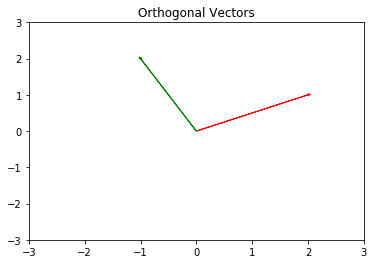

Dot product for v1, v2: 0


In [59]:
v1 = [2,1]
v2 = [-1, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-3,3)
plt.title("Orthogonal Vectors")
plt.show()

# These are Orthogonal Vectors or Perpendicular Vectors

print('Dot product for v1, v2:', v1[0]*v2[0] + v1[1]*v2[1])

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [63]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a,b)

-40

a and b are not othogonal because the dot product is not 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [74]:
np.linalg.norm(c)**2

665.0

In [69]:
np.dot(c,c)

665

In [78]:
np.matmul(np.transpose(c),c)

665

These Values are all the same.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 12\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12 ,11, 9, 2])

In [92]:
norm = np.linalg.norm(f)
f_hat = 1/ norm * f
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

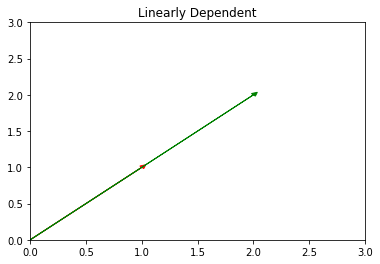

In [111]:
ld1 = [1, 1]
ld2 = [2, 2]

lid1 = [1,2]
lid2 = [1,3]

# Plot the Linearly Dependent Vectors
plt.arrow(0,0, ld1[0], ld1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, ld2[0], ld2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(0,3)          
plt.ylim(0,3)
plt.title("Linearly Dependent")
plt.show()

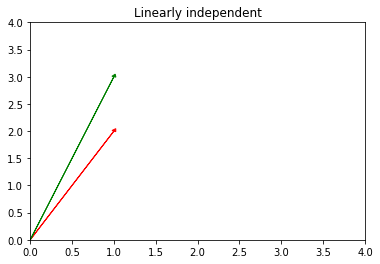

In [110]:
# Plot the Linearly independent Vectors
plt.arrow(0,0, lid1[0], lid1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, lid2[0], lid2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(0,4)          
plt.ylim(0,4)
plt.title("Linearly independent")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
from numpy.linalg import matrix_rank

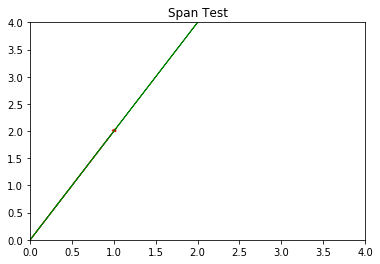

In [98]:
g = [1,2]
h = [4,8]

plt.arrow(0,0, g[0], g[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, h[0], h[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(0,4)          
plt.ylim(0,4)
plt.title("Span Test")
plt.show()

# These are not linearly independent therefore they only span R^1 or One Dimension

In [105]:
test = [[1,2],
       [4,8]]

matrix_rank(test)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [103]:
p = [[1, 2, 3],
    [-1, 0, 7],
    [4, 8, 2]]

matrix_rank(p)
# Spans 3 Dimensions

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



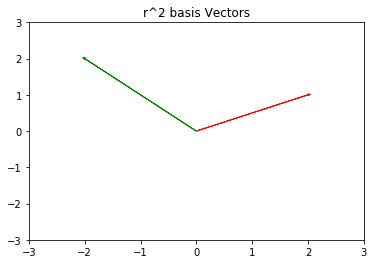

In [109]:
aqpw = [2,1]
wqpa = [-2,2]

# Plot the Linearly independent Vectors
plt.arrow(0,0, aqpw[0], aqpw[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, wqpa[0], wqpa[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-3,3)
plt.title("r^2 basis Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

Having two linearly independent vectors that can be scaled in any for along to form any other form in that dimensional space it they occupy.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

The Rank of P is 3 because all three vectors are linearly independant


## 7.2 What does the rank of a matrix tell us?

It tells us what dimenions the matrix spans.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [134]:
v = np.array([1,3]) 
w = np.array([-1,2])

c_thing = np.dot(w,v) / np.dot(v,v)
ans = np.multiply(c_thing, v)
ans

array([0.5, 1.5])

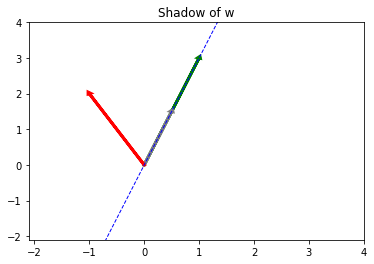

In [139]:
# Plot a line

# Axis Bounds
plt.xlim(-2.1,4)          
plt.ylim(-2.1,4)

proj = [0.5, 1.5]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='grey')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

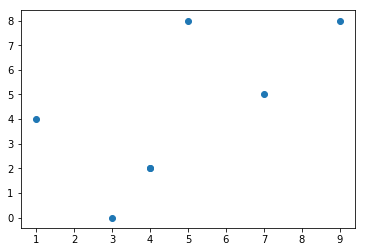

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()